In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris

S:\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


生成一个线性可分数据集

In [2]:
def creat_data(n):
    np.random.seed(1)
    x_11 = np.random.randint(0,100,(n,1))  # 随机生成一个二元数组，范围是0-100，数组维度是n行1列 
    x_12 = np.random.randint(0,100,(n,1,))
    x_13 = 20+np.random.randint(0,10,(n,1,))
    x_21 = np.random.randint(0,100,(n,1,))
    x_22 = np.random.randint(0,100,(n,1,))
    x_23 = 10-np.random.randint(0,10,(n,1,))
    
    new_x_12 = x_12*np.sqrt(2)/2-x_13*np.sqrt(2)/2 # 沿x粥旋转45度
    new_x_13 = x_12*np.sqrt(2)/2+x_13*np.sqrt(2)/2
    new_x_22 = x_22*np.sqrt(2)/2-x_23*np.sqrt(2)/2
    new_x_23 = x_22*np.sqrt(2)/2+x_23*np.sqrt(2)/2
    
    plus_samples = np.hstack([x_11,new_x_12,new_x_13,np.ones((n,1))])
    minus_samples = np.hstack([x_21,new_x_22,new_x_23,-np.ones((n,1))])
    samples = np.vstack([plus_samples,minus_samples])
    np.random.shuffle(samples)
    return samples

绘制数据集的函数：

In [3]:
def plot_samples(ax, samples):
    Y = samples[:,-1]
    position_p = Y == 1
    position_m = Y == -1
    ax.scatter(samples[position_p,0],samples[position_p,1],
              samples[position_p,2], marker='+',label = '+', color = 'b')
    ax.scatter(samples[position_m,0],samples[position_m,1],
              samples[position_m,2], marker='^',label = '-', color = 'r')

调用plot_samples:

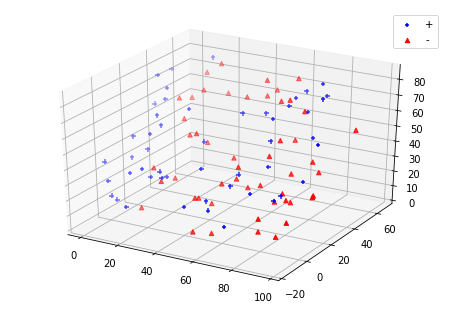

In [4]:
fig = plt.figure()
ax = Axes3D(fig)
data = creat_data(50)
plot_samples(ax, data)
ax.legend(loc = 'best')
plt.show()

**给出感知机算法的原始算法函数：**

In [5]:
def perceptron(train_data,eta,w_0,b_0):
    x = train_data[:,:-1]   # x的数据
    y = train_data[:,-1]    # 对应的分类
    length = train_data.shape[0]  # 样本集大小
    
    w = w_0
    b = b_0
    step_num = 0
    
    while True:
        i = 0
        while(i<length): # 遍历一轮的样本集中所有的点
            step_num+=1
            x_i = x[i].reshape((x.shape[1],1))
            y_i = y[i]
            if y_i*(np.dot(np.transpose(w),x_i)+b)<=0: # 如果该分类点是误分类点
                w = w+eta*y_i*x_i         # 梯度下降
                b = b+eta*y_i             # 梯度下降
                break   # 跳出循环，执行下一轮筛选
            else:   # 否则的话，该店不是误分类点，选取下一个样本点
                i+=1
        if(i ==length):  # 没有误分类点，结束循环
            break
    return(w,b,step_num)

In [6]:
def creat_hyperplane(x,y,w,b):
    return (-w[0][0]*x-w[1][0]*y-b)/w[2][0]

观察感知机原始算法的运行情况：

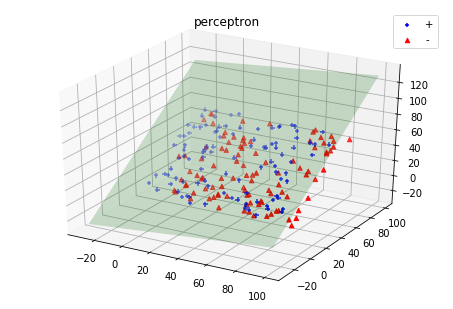

In [7]:
data = creat_data(100)
eta,w_0,b_0 = 0.1, np.ones((3,1), dtype=float),1
w,b,num = perceptron(data,eta,w_0,b_0)

fig = plt.figure()
plt.suptitle("perceptron")
ax = Axes3D(fig)

### 绘制样本点
plot_samples(ax,data)

### 绘制分离超平面
x = np.linspace(-30,100,100)
y = np.linspace(-30,100,100)
x,y = np.meshgrid(x,y)
z = creat_hyperplane(x,y,w,b)
ax.plot_surface(x,y,z,rstride = 1,cstride = 1,color='g',alpha=0.2)

ax.legend(loc="best")
plt.show()

**感知机算法对偶形式：**

In [8]:
def creat_w(train_data, alpha):
    x = train_data[:,:-1]
    y = train_data[:,-1]
    N = train_data.shape[0]
    w = np.zeros((x.shape[1],1))
    
    for i in range(0,N):
        w = w+alpha[i][0]*y[i]*(x[i].reshape(x[i].size,1))
    return w

In [12]:
def perceptron_dual(train_data,eta,alpha_0,b_0):
    x = train_data[:,:-1]
    y = train_data[:,-1]
    length = train_data.shape[0]
    alpha = alpha_0
    b = b_0
    step_num = 0
    
    while True:
        i = 0
        while(i<length):
            step_num+=1
            x_i = x[i].reshape((x.shape[1],1))
            y_i = y[i]
            w = creat_w(train_data,alpha)
            z = y_i*(np.dot(np.transpose(w),x_i)+b)
            if(z<=0):  # 该点是误分类点
                alpha[i][0] +=eta
                b+=eta*y_i
                break
            else:
                i=i+1
            if(i==length):
                break
        return (alpha,b,step_num)

观察感知机原始形式和对偶形式的运行情况：

w_1,b_1 [[-10.1       ]
 [-68.08433252]
 [ 64.85174234]] -651.4000000000796
w_2,b_2 [[ 6.4       ]
 [-0.91923882]
 [ 2.75771645]] 0.1


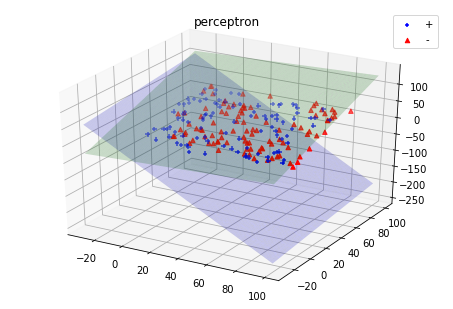

In [13]:
data = creat_data(100)
eta,w_0,b_0 = 0.1, np.ones((3,1),dtype = float), 1
w_1,b_1,num_1 = perceptron(data,eta,w_0,b_0)
alpha,b_2,num_2 = perceptron_dual(data,eta=0.1,alpha_0=np.zeros((data.shape[0]*2,1)),
                                 b_0=0)
w_2 = creat_w(data,alpha)

print("w_1,b_1",w_1,b_1)
print("w_2,b_2",w_2,b_2)

fig = plt.figure()
plt.suptitle("perceptron")
ax = Axes3D(fig)

### 绘制样本点
plot_samples(ax,data)

## 绘制分离超平面
x = np.linspace(-30,100,100)
y = np.linspace(-30,100,100)
x,y = np.meshgrid(x,y)  # 划分网络
z = creat_hyperplane(x,y,w_1,b_1)
z_2 = creat_hyperplane(x,y,w_2,b_2)

ax.plot_surface(x,y,z,rstride=1, cstride=1, color='g', alpha=0.2)
ax.plot_surface(x,y,z_2,rstride=1, cstride=1, color='b', alpha=0.2)
ax.legend(loc="best")

plt.show()

现考察$\eta$参数对收敛速度的影响：

In [19]:
def test_eta(data,ax,etas,w_0,alpha_0,b_0):
    nums1 = []
    nums2 = []
    for eta in etas:
        _,_,num_1 = perceptron(data,eta,w_0=w_0,b_0=b_0)
        _,_,num_2 = perceptron_dual(data,eta=0.1,alpha_0=alpha_0,b_0=b_0)
        nums1.append(num_1)
        nums2.append(num_2)
        ax.plot(etas,np.array(nums1),label='orignal itreation times')
        ax.plot(etas,np.array(nums2),laebl='dual iteration times')

调用上面的函数：

ValueError: x and y must have same first dimension, but have shapes (25,) and (1,)

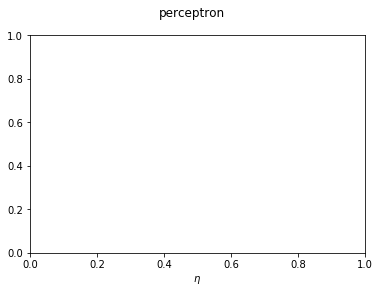

In [21]:
fig = plt.figure()
fig.suptitle("perceptron")
ax = fig.add_subplot(1,1,1)
ax.set_xlabel(r'$\eta$')

data = creat_data(1)
etas = np.linspace(0.01,1,num = 25, endpoint=False)
w_0,b_0,alpha_0 = np.ones((3,1)), 0, np.zeros((data.shape[0],1))
test_eta(data,ax,etas,w_0,alpha_0,b_0)

ax.legend(loc = "best", framealpha=0.5)
plt.show()

### 代码有问题？？还是我写的有问题？？